# Heart_Disease_Classifier(Binary_classifier)

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading dataset
df = pd.read_csv('heart_disease_dataset.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

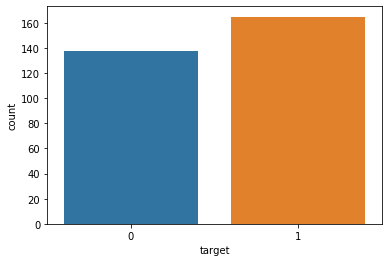

In [6]:
#checking the data balance
sns.countplot(x=df.target, data=df)

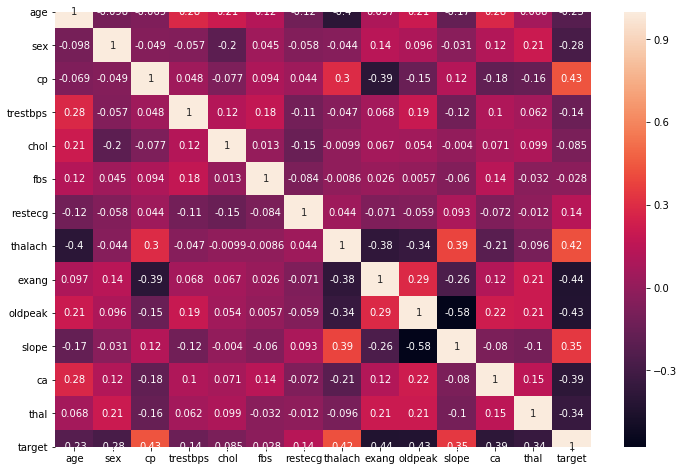

In [7]:
#correlation visualization
plt.figure(figsize=(12,8))
corrmat = df.corr()
sns.heatmap(corrmat, annot=True)

In [8]:
#creating dummy columns
cp = pd.get_dummies(df.cp, prefix='cp', drop_first=True)
thal = pd.get_dummies(df.thal, prefix='thal', drop_first=True)
slope = pd.get_dummies(df.slope, prefix='slope', drop_first=True)

df = [df, cp, thal, slope]

In [9]:
df = pd.concat(df, axis=1)

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,1,1,0,0,1,1,0,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,2,1,0,1,0,0,1,0,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,2,1,1,0,0,0,1,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,2,1,1,0,0,0,1,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,2,1,0,0,0,0,1,0,0,1


In [11]:
#dropping unnecessary columns
drop_cols = ['cp', 'thal', 'slope']
df.drop(drop_cols, axis=1)

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,1,1,0,0,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,1,0,0,1,0,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,1,0,0,0,1,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,1,0,0,0,1,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,0,0,0,0,0,0,0,1,1,0
299,45,1,110,264,0,1,132,0,1.2,0,0,0,0,1,0,0,1,1,0
300,68,1,144,193,1,1,141,0,3.4,2,0,0,0,0,0,0,1,1,0
301,57,1,130,131,0,1,115,1,1.2,1,0,0,0,0,0,0,1,1,0


In [12]:
#splitting data into train and test
X = df.drop(['target'], axis=1).values
y = df.target.values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
#scaling values
from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

### Logistic Regression

In [14]:
class LogisticRegression:
    #initializing parameters
    def parameter_initialization(self, features):
        weights = np.full((features,1),0.01)
        bias = 0.0
        return weights, bias
    
    #activation function
    def sigmoid(self, x):
        y_activation = 1/(1+np.exp(-x))
        return y_activation
       
    def forwardbackprop(self,X_train, y_train, weights, bias):
        #forward propagation
        y_activation = self.sigmoid(np.dot(X_train, weights) + bias)
        loss = -(y_train*np.log(y_activation) + (1-y_train)*np.log(1-y_activation))
        cost = np.sum(loss) / X_train.shape[0]
  
        #backward propagation
        derivative_weight = np.dot(X_train.T,(y_activation-y_train))/X_train.shape[0]
        derivative_bias = np.sum(y_activation-y_train)/X_train.shape[0]
    
        return cost, derivative_weight, derivative_bias
    
    def update_parameters(self, X_train, y_train, weights, bias, lr, iterations):
        costs = []
        iteration = []
        for i in range(iterations):
            cost, derivative_weight, derivative_bias = self.forwardbackprop(X_train, y_train, weights, bias)
            weights = weights - lr * derivative_weight
            bias = bias - lr * derivative_bias
            costs.append(cost)
            iteration.append(i)
            print(f'training epoch: {i+1}   cost: {cost}')
            
        return weights, bias, costs, iteration
    
    def predict(self, features, weights, bias):
        y_pred = np.zeros((features.shape[0], 1))
        y_activation = self.sigmoid(np.dot(features, weights) + bias)
    
        for i in range(len(y_activation)):
            if y_activation[i,0] <= 0.5:
                y_pred[i,0] = 0
    
            else:
                y_pred[i, 0] = 1
            
        return y_pred
    
    def logistic_regression(self, X_train, y_train, X_test, y_test, lr, iterations):
        features = X_train.shape[1]
    
        weights, bias = self.parameter_initialization(features)
    
        weights, bias, costs, iteration = self.update_parameters(X_train, y_train, weights, bias, lr, iterations)
    
        X_pred = self.predict(X_train, weights, bias)
        y_pred = self.predict(X_test, weights, bias)
    
        test_score = 100 - (np.mean(np.abs(y_pred - y_test)) * 100)
        train_score = 100 - (np.mean(np.abs(X_pred - y_train)) * 100)
        print('\nTrain accuracy: ', train_score)
        print('Test accuracy: ', test_score)
        
        return costs, iteration

In [15]:
logistic = LogisticRegression()

In [16]:
costs, iteration = logistic.logistic_regression(X_train, y_train.reshape(-1,1), X_test, y_test.reshape(-1,1), 0.5, 20)

training epoch: 1   cost: 0.6949341053261842
training epoch: 2   cost: 0.4887683439741221
training epoch: 3   cost: 0.43046377805971203
training epoch: 4   cost: 0.40317677221193865
training epoch: 5   cost: 0.38704209020723723
training epoch: 6   cost: 0.3762703969905568
training epoch: 7   cost: 0.3685317048155483
training epoch: 8   cost: 0.3626917243104252
training epoch: 9   cost: 0.35812541231904677
training epoch: 10   cost: 0.3544573064845264
training epoch: 11   cost: 0.35144717817548193
training epoch: 12   cost: 0.34893376576809804
training epoch: 13   cost: 0.3468046495172551
training epoch: 14   cost: 0.344979022588618
training epoch: 15   cost: 0.3433973043854761
training epoch: 16   cost: 0.3420146046599643
training epoch: 17   cost: 0.3407964625206306
training epoch: 18   cost: 0.3397159847901658
training epoch: 19   cost: 0.33875187496485776
training epoch: 20   cost: 0.33788704567359273

Train accuracy:  86.36363636363636
Test accuracy:  83.60655737704919


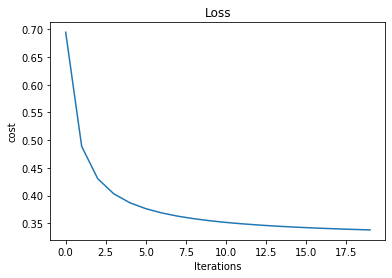

In [17]:
plt.plot(iteration, costs)
plt.xlabel('Iterations')
plt.ylabel('cost')
plt.title('Loss')
plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
score = lr.score(X_test, y_test)

In [20]:
print('Test accuracy: ',score*100)

Test accuracy:  83.60655737704919


In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[18,  7],
       [ 3, 33]])

### K-Nearest Neighbour (KNN) classification

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score = knn.score(X_test, y_test)

In [23]:
print('Test accuracy: ', score*100)

Test accuracy:  77.04918032786885


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[19,  6],
       [ 8, 28]])

### Random forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
score = rfc.score(X_test, y_test)

In [26]:
print('Test accuracy: ', score*100)

Test accuracy:  80.32786885245902


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[20,  5],
       [ 7, 29]])

### Support Vector Machine (SVM) algorithm

In [28]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
score = svm.score(X_test, y_test)

In [29]:
print('Test accuracy: ', score*100)

Test accuracy:  80.32786885245902


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[18,  7],
       [ 5, 31]])